# Exercise 7 Autoregressors

For this exercise we will load a different dataset.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spx.csv')
yr = []
for x in df.date:
    x = int(x[-2:])
    if x < 10:
        x = f'200{x}'
    elif x < 20:
        x = f'20{x}'
    else:
        x = f'19{x}'  
    yr.append(x)
df['Year'] = yr
df.head()

,date,close,Year
0,02-Jan-86,209.59,1986
1,03-Jan-86,210.88,1986
2,06-Jan-86,210.65,1986
3,07-Jan-86,213.80,1986
4,08-Jan-86,207.97,1986


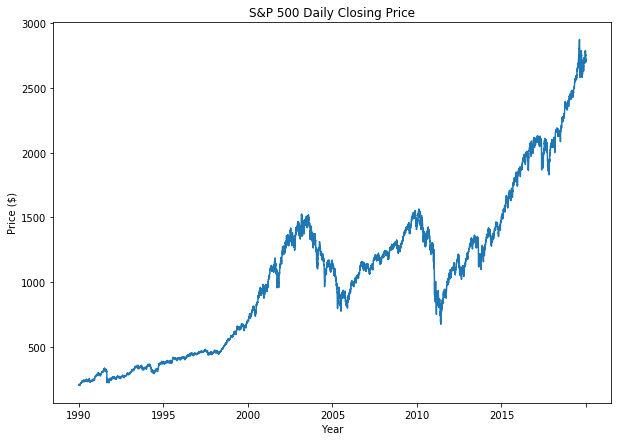

In [3]:
plt.figure(figsize=(10, 7))
plt.plot(df.close.values);
yrs = [yr for yr in df.Year.unique() if (int(yr[-2:]) % 5 == 0)]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('S&P 500 Daily Closing Price');
plt.xlabel('Year');
plt.ylabel('Price ($)');

Let's look at what lag is actually doing to the data

In [4]:
df.close[:10].values

array([209.59, 210.88, 210.65, 213.8 , 207.97, 206.11, 205.96, 206.72,
       206.64, 208.26])

In [5]:
df.close[:10].shift(3).values

array([   nan,    nan,    nan, 209.59, 210.88, 210.65, 213.8 , 207.97,
       206.11, 205.96])

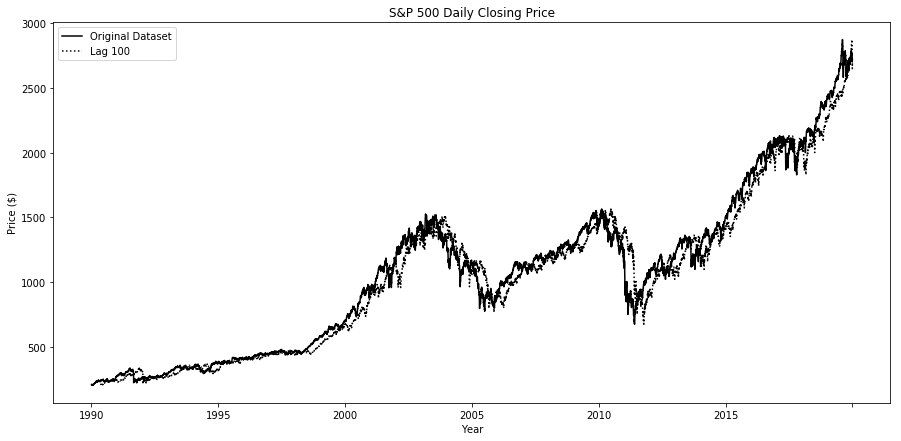

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(df.close.values, label='Original Dataset', c='k', linestyle='-');
plt.plot(df.close.shift(100), c='k', linestyle=':', label='Lag 100');
yrs = [yr for yr in df.Year.unique() if (int(yr[-2:]) % 5 == 0)]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('S&P 500 Daily Closing Price');
plt.xlabel('Year');
plt.ylabel('Price ($)');
plt.legend();

We need to check if autoregression is appropriate for the dataset.  To do this we will use an autocorrelation plot.

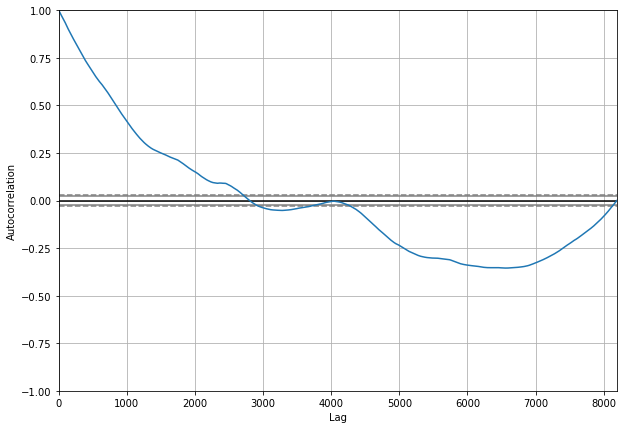

In [7]:
plt.figure(figsize=(10, 7))
pd.plotting.autocorrelation_plot(df.close);

Enhance the view of the autocorrelation plot.

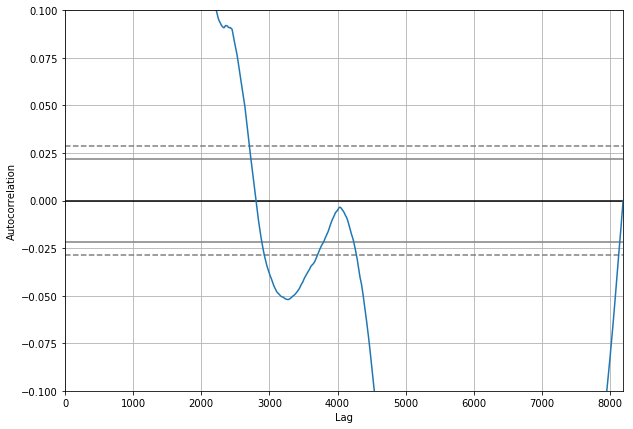

In [8]:
plt.figure(figsize=(10, 7))
ax = pd.plotting.autocorrelation_plot(df.close);
ax.set_ylim([-0.1, 0.1]);

Let's visualise the correlation between the original dataset and the dataset with a lag of 100, which has a high degree of correlation.

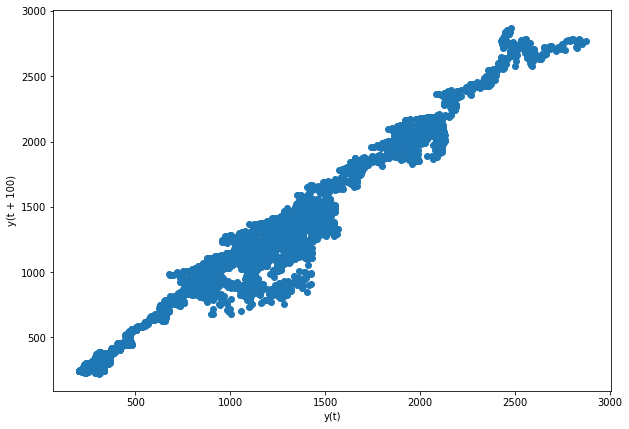

In [9]:
plt.figure(figsize=(10,7))
ax = pd.plotting.lag_plot(df.close, lag=100);

We will also visualise a lag setting which results in poor correlation (lag = 4000)

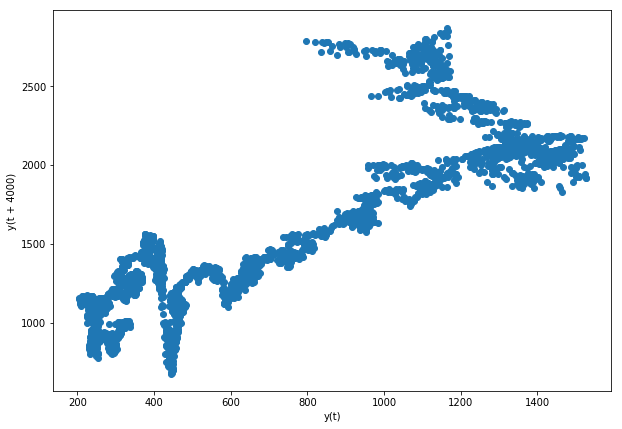

In [10]:
plt.figure(figsize=(10,7))
ax = pd.plotting.lag_plot(df.close, lag=4000);

To create a autoregression model import the *statsmodel* package.  Uncomment one of the lines below, using the *conda install* line if you are using Anaconda, else use pip.  If you are at all unsure the *pip* method should work for either Anaconda or non-Anaconda installations

In [11]:
# !conda install -c conda-forge statsmodels
# !pip install statsmodels

In [12]:
from statsmodels.tsa.ar_model import AR
model = AR(df.close)

In [13]:
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 36
Coefficients: const        0.114237
L1.close     0.944153
L2.close     0.008452
L3.close     0.046900
L4.close    -0.014887
L5.close    -0.024734
L6.close     0.025849
L7.close    -0.004821
L8.close     0.009209
L9.close    -0.010451
L10.close    0.033449
L11.close   -0.029657
L12.close    0.052843
L13.close   -0.031489
L14.close   -0.023010
L15.close   -0.018195
L16.close    0.060165
L17.close    0.004425
L18.close   -0.057269
L19.close    0.025184
L20.close    0.008416
L21.close   -0.020273
L22.close    0.024271
L23.close   -0.010330
L24.close    0.004574
L25.close   -0.016035
L26.close    0.005954
L27.close    0.032375
L28.close   -0.037643
L29.close    0.024265
L30.close   -0.006099
L31.close   -0.018106
L32.close    0.005761
L33.close   -0.002750
L34.close   -0.037882
L35.close    0.046765
L36.close    0.000887
dtype: float64


In [14]:
predictions = model_fit.predict(start=36, end=len(df) + 500)
predictions[:10].values

array([224.22071026, 224.18191256, 224.47901622, 224.15407352,
       226.46426347, 226.72721775, 225.6576946 , 224.52871226,
       224.56431615, 225.15588295])

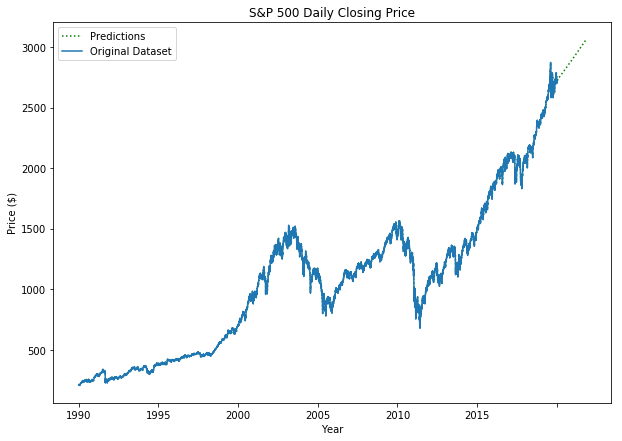

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(predictions, c='g', linestyle=':', label='Predictions');
plt.plot(df.close.values, label='Original Dataset');
yrs = [yr for yr in df.Year.unique() if (int(yr[-2:]) % 5 == 0)]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('S&P 500 Daily Closing Price');
plt.xlabel('Year');
plt.ylabel('Price ($)');
plt.legend();

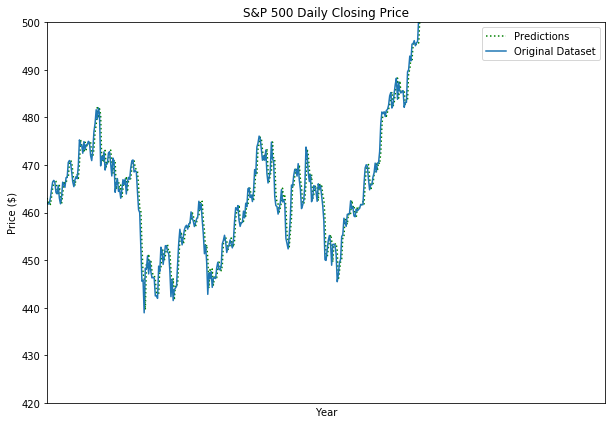

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(predictions, c='g', linestyle=':', label='Predictions');
plt.plot(df.close.values, label='Original Dataset');
yrs = [yr for yr in df.Year.unique() if (int(yr[-2:]) % 5 == 0)]
plt.xticks(np.arange(0, len(df), len(df) // len(yrs)), yrs);
plt.title('S&P 500 Daily Closing Price');
plt.xlabel('Year');
plt.ylabel('Price ($)');
plt.xlim([2000, 2500])
plt.ylim([420, 500])
plt.legend();